# 1. Model_1 [final] - 7 labels

## [1] Getting data (FER2013) & Preprocessing

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"niceonesuri","key":"698dd6136afe9fe29d011e39a0d8c95b"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d msambare/fer2013

fer2013.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -q fer2013.zip

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = "/content/train"
test_dir = "/content/test"

In [ ]:
# Augmentation
train_datagen = ImageDataGenerator(
    width_shift_range = 0.1,        # Randomly shift the width of images by up to 10%
    height_shift_range = 0.1,       # Randomly shift the height of images by up to 10%
    horizontal_flip = True,         # Flip images horizontally at random
    rescale = 1./255,               # Rescale pixel values to be between 0 and 1
    validation_split = 0.2          # Set aside 20% of the data for validation
)

# Rescaling and Validation split
validation_datagen = ImageDataGenerator(
    rescale = 1./255,               # Rescale pixel values to be between 0 and 1
    validation_split = 0.2          # Set aside 20% of the data for validation
)

In [ ]:
# Rescaling and Validation split
validation_datagen = ImageDataGenerator(
    rescale = 1./255,               # Rescale pixel values to be between 0 and 1
    validation_split = 0.2          # Set aside 20% of the data for validation
)

# generate batches of augmented and preprocessed images for training and validation

train_generator = train_datagen.flow_from_directory(
    directory = train_dir,           # Directory containing the training data
    target_size = (48, 48),          # Resizes all images to 48x48 pixels
    batch_size = 64,                 # Number of images per batch
    color_mode = "grayscale",        # Converts the images to grayscale
    class_mode = "categorical",      # Classifies the images into 7 categories
    subset = "training"              # Uses the training subset of the data
)

validation_generator = validation_datagen.flow_from_directory(
    directory = test_dir,            # Directory containing the validation data
    target_size = (48, 48),          # Resizes all images to 48x48 pixels
    batch_size = 64,                 # Number of images per batch
    color_mode = "grayscale",        # Converts the images to grayscale
    class_mode = "categorical",      # Classifies the images into 7 categories
    subset = "validation"            # Uses the validation subset of the data
)

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


## [2] Modelling

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
import tensorflow as tf

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

checkpoint_callback = ModelCheckpoint(
    filepath='model_1_checkpoints.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)

In [ ]:
# Train the model with the callback
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=60,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[checkpoint_callback, early_stopping]
)

Epoch 1/60
359/359 [==============================] - ETA: 0s - loss: 2.7255 - accuracy: 0.1859
Epoch 1: val_accuracy improved from -inf to 0.25000, saving model to model_weights.h5
359/359 [==============================] - 31s 68ms/step - loss: 2.7255 - accuracy: 0.1859 - val_loss: 1.9268 - val_accuracy: 0.2500
Epoch 2/60
359/359 [==============================] - ETA: 0s - loss: 2.3468 - accuracy: 0.2291
Epoch 2: val_accuracy improved from 0.25000 to 0.32193, saving model to model_weights.h5
359/359 [==============================] - 20s 55ms/step - loss: 2.3468 - accuracy: 0.2291 - val_loss: 1.7674 - val_accuracy: 0.3219
Epoch 3/60
359/359 [==============================] - ETA: 0s - loss: 2.1621 - accuracy: 0.2665
Epoch 3: val_accuracy improved from 0.32193 to 0.36383, saving model to model_weights.h5
359/359 [==============================] - 21s 57ms/step - loss: 2.1621 - accuracy: 0.2665 - val_loss: 1.6719 - val_accuracy: 0.3638
Epoch 4/60
359/359 [=============================

In [ ]:
model.save('/content/my_model_ML.h5')

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/my_model_ML.h5')

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[checkpoint_callback, early_stopping]
)

Epoch 1/20
359/359 [==============================] - ETA: 0s - loss: 0.9403 - accuracy: 0.6493
Epoch 1: val_accuracy did not improve from 0.65573
359/359 [==============================] - 20s 56ms/step - loss: 0.9403 - accuracy: 0.6493 - val_loss: 0.9555 - val_accuracy: 0.6466
Epoch 2/20
358/359 [============================>.] - ETA: 0s - loss: 0.9406 - accuracy: 0.6475
Epoch 2: val_accuracy did not improve from 0.65573
359/359 [==============================] - 19s 54ms/step - loss: 0.9411 - accuracy: 0.6474 - val_loss: 0.9656 - val_accuracy: 0.6501
Epoch 3/20
359/359 [==============================] - ETA: 0s - loss: 0.9384 - accuracy: 0.6488
Epoch 3: val_accuracy did not improve from 0.65573
359/359 [==============================] - 20s 56ms/step - loss: 0.9384 - accuracy: 0.6488 - val_loss: 0.9636 - val_accuracy: 0.6390
Epoch 4/20
359/359 [==============================] - ETA: 0s - loss: 0.9341 - accuracy: 0.6527
Epoch 4: val_accuracy did not improve from 0.65573
359/359 [====

In [ ]:
model.load_weights('model_weights.h5')

In [ ]:
model.save('/content/my_model_ML.keras')

## [3] Evaluating

In [ ]:
evaluation = model.evaluate(validation_generator, verbose=1)
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

23/23 [==============================] - 0s 20ms/step - loss: 0.9499 - accuracy: 0.6557
Validation Loss: 0.9498518705368042
Validation Accuracy: 0.6557262539863586


In [ ]:
import matplotlib.pyplot as plt
epochs = range(1, 51)

# Plot the train and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

23/23 [==============================] - 1s 18ms/step


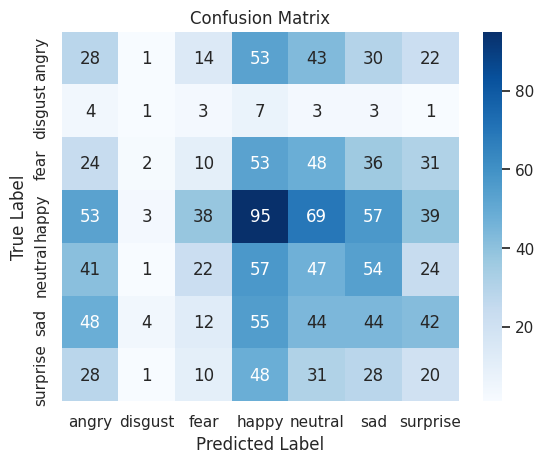

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Get the true labels and predicted labels for the validation set
validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_generator.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from PIL import Image

def plot_prediction(model, image_path):
    # Step 1: Plot the original image
    original_image = plt.imread(image_path)
    plt.figure(figsize=(6, 6))
    plt.imshow(original_image)
    plt.axis('off')

    # Step 2: Resize the image, convert it to grayscale, and normalize pixel values
    image = Image.open(image_path)
    resized_image = image.resize((48, 48))
    resized_image = resized_image.convert('L')  # Convert to grayscale
    resized_image = np.array(resized_image) / 255.0  # Normalize pixel values
    resized_image = tf.convert_to_tensor(resized_image, dtype=tf.float32)
    resized_image = tf.expand_dims(resized_image, axis=-1)  # Add channel dimension

    # Step 3: Perform prediction
    output = model.predict(tf.expand_dims(resized_image, axis=0))

    print(output)
    predicted_class = np.argmax(output)

    print(predicted_class)

    # Step 4: Generate new label based on predicted class
    labels = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}  # Define label names mapping

    if predicted_class == 3:  # Assuming 'happy' corresponds to class 0
        new_label = 'Understand'
    elif predicted_class == 6 or predicted_class == 4:  # Assuming 'neutral' and 'surprised' correspond to classes 1 and 2
        new_label = 'Neutral'
    else:
        new_label = 'Not Understand'

    # Set title with prediction information
    plt.title(f"{labels[predicted_class]} -> [{new_label}]",
              fontsize=18,
              fontweight='bold',
              fontfamily='Serif',
              color="red")

    # Show the plot
    plt.show()


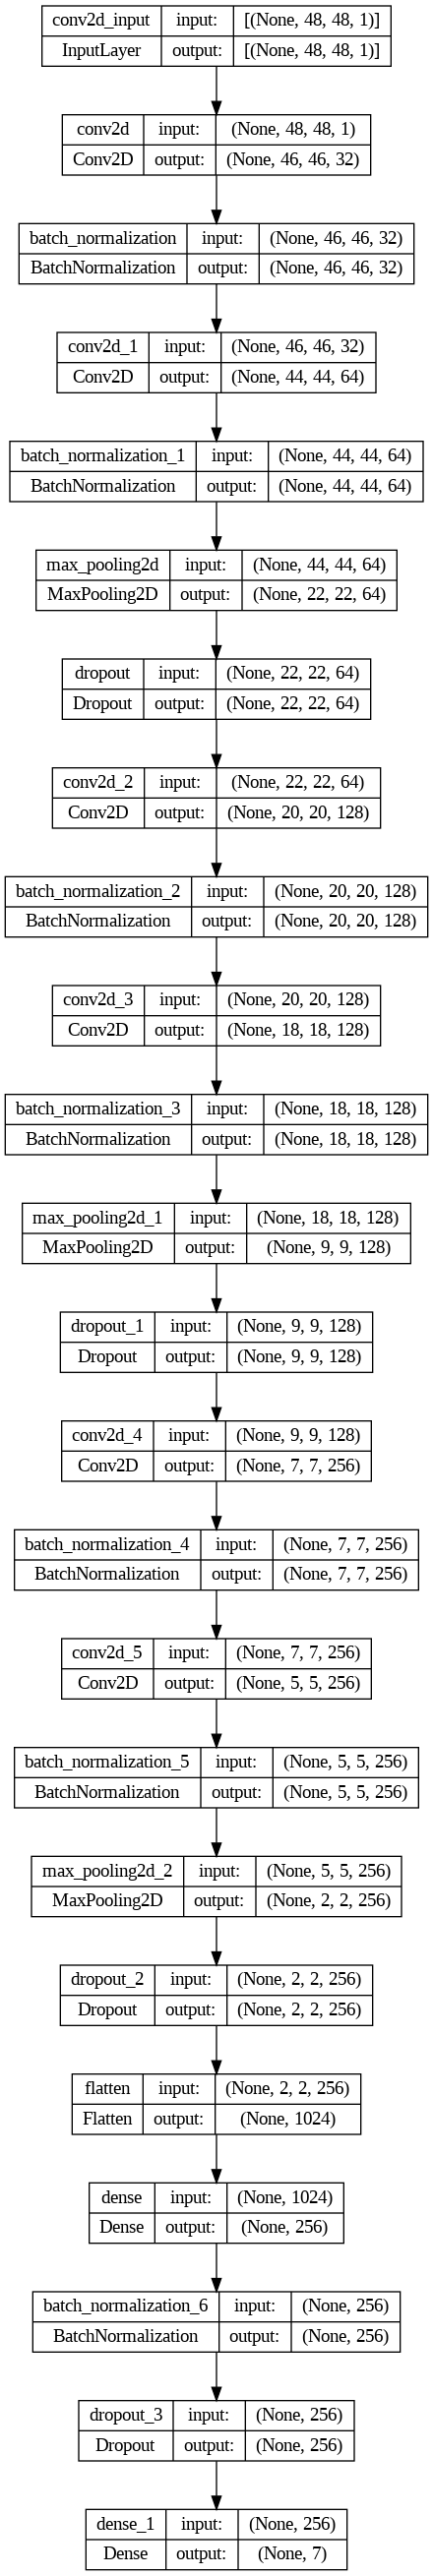

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, to_file='model_plot.png')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 46, 46, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 44, 44, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 64)        0         
 D)                                                              
                                                        

# 2. Model_at [final] - 3 labels
* 3 labels : Neutral/Not Understand/Understand

## Labels Fix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab import files
files.upload()

Saving altered.zip to altered.zip


In [ ]:
!unzip -q altered.zip

### Get_Data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = "/content/fer2013/train"
test_dir = "/content/fer2013/test"

# Augmentation
train_datagen = ImageDataGenerator(
    width_shift_range = 0.1,        # Randomly shift the width of images by up to 10%
    height_shift_range = 0.1,       # Randomly shift the height of images by up to 10%
    horizontal_flip = True,         # Flip images horizontally at random
    rescale = 1./255,               # Rescale pixel values to be between 0 and 1
    validation_split = 0.2          # Set aside 20% of the data for validation
)

# Rescaling and Validation split
validation_datagen = ImageDataGenerator(
    rescale = 1./255,               # Rescale pixel values to be between 0 and 1
    validation_split = 0.2          # Set aside 20% of the data for validation
)

# generate batches of augmented and preprocessed images for training and validation

train_generator = train_datagen.flow_from_directory(
    directory = train_dir,           # Directory containing the training data
    target_size = (48, 48),          # Resizes all images to 48x48 pixels
    batch_size = 64,                 # Number of images per batch
    color_mode = "grayscale",        # Converts the images to grayscale
    class_mode = "categorical",      # Classifies the images into 7 categories
    subset = "training"              # Uses the training subset of the data
)

validation_generator = validation_datagen.flow_from_directory(
    directory = test_dir,            # Directory containing the validation data
    target_size = (48, 48),          # Resizes all images to 48x48 pixels
    batch_size = 64,                 # Number of images per batch
    color_mode = "grayscale",        # Converts the images to grayscale
    class_mode = "categorical",      # Classifies the images into 7 categories
    subset = "validation"            # Uses the validation subset of the data
)

Found 22967 images belonging to 3 classes.
Found 1434 images belonging to 3 classes.


### Modelling

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
import tensorflow as tf

model_at = Sequential()

model_at.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model_at.add(BatchNormalization())
model_at.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_at.add(BatchNormalization())
model_at.add(MaxPooling2D(pool_size=(2, 2)))
model_at.add(Dropout(0.25))

model_at.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_at.add(BatchNormalization())
model_at.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_at.add(BatchNormalization())
model_at.add(MaxPooling2D(pool_size=(2, 2)))
model_at.add(Dropout(0.25))

model_at.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model_at.add(BatchNormalization())
model_at.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model_at.add(BatchNormalization())
model_at.add(MaxPooling2D(pool_size=(2, 2)))
model_at.add(Dropout(0.25))

model_at.add(Flatten())
model_at.add(Dense(256, activation='relu'))
model_at.add(BatchNormalization())
model_at.add(Dropout(0.5))
model_at.add(Dense(3, activation='softmax'))

model_at.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
# callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=4)

checkpoint_callback = ModelCheckpoint(
    filepath='model_at_weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)

In [ ]:
# Train the model with the callback
history_at = model_at.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[checkpoint_callback, early_stopping]
)

Epoch 1/50
359/359 [==============================] - ETA: 0s - loss: 1.6790 - accuracy: 0.3785
Epoch 1: val_accuracy improved from -inf to 0.45607, saving model to model_at_weights.h5
359/359 [==============================] - 34s 61ms/step - loss: 1.6790 - accuracy: 0.3785 - val_loss: 1.1292 - val_accuracy: 0.4561
Epoch 2/50
359/359 [==============================] - ETA: 0s - loss: 1.4329 - accuracy: 0.4108
Epoch 2: val_accuracy improved from 0.45607 to 0.49861, saving model to model_at_weights.h5
359/359 [==============================] - 19s 53ms/step - loss: 1.4329 - accuracy: 0.4108 - val_loss: 1.0077 - val_accuracy: 0.4986
Epoch 3/50
358/359 [============================>.] - ETA: 0s - loss: 1.2971 - accuracy: 0.4398
Epoch 3: val_accuracy improved from 0.49861 to 0.56973, saving model to model_at_weights.h5
359/359 [==============================] - 21s 57ms/step - loss: 1.2967 - accuracy: 0.4399 - val_loss: 0.9085 - val_accuracy: 0.5697
Epoch 4/50
359/359 [====================

In [ ]:
# Assuming your model is named model_at
model_at.save("model_at.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)  # You can apply any other necessary preprocessing here

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),  # Adjust target size according to your model input shape
    batch_size=32,  # Specify batch size
    class_mode='categorical',  # Specify class mode based on your problem (e.g., binary or categorical)
    color_mode='grayscale',  # If your images are grayscale
    shuffle=False  # Set shuffle to False for consistent evaluation
)



evaluation = model_at.evaluate(test_generator)

# Print the evaluation results
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

Found 7178 images belonging to 3 classes.
225/225 [==============================] - 6s 24ms/step - loss: 0.5861 - accuracy: 0.7463
Test Loss: 0.586087167263031
Test Accuracy: 0.7463081479072571


### prediction

In [ ]:
from google.colab import files
files.upload()

!unzip -q my_data_images.zip

Saving my_data_images.zip to my_data_images.zip


In [ ]:
model_at.load_weights('model_at_weights.h5')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from PIL import Image

def plot_prediction(model, image_path):
    # Step 1: Plot the original image
    original_image = plt.imread(image_path)
    plt.figure(figsize=(6, 6))
    plt.imshow(original_image)
    plt.axis('off')

    # Step 2: Resize the image, convert it to grayscale, and normalize pixel values
    image = Image.open(image_path)
    resized_image = image.resize((48, 48))
    resized_image = resized_image.convert('L')  # Convert to grayscale
    resized_image = np.array(resized_image) / 255.0  # Normalize pixel values
    resized_image = tf.convert_to_tensor(resized_image, dtype=tf.float32)
    resized_image = tf.expand_dims(resized_image, axis=-1)  # Add channel dimension

    # Step 3: Perform prediction
    output = model.predict(tf.expand_dims(resized_image, axis=0))
    predicted_class = np.argmax(output)

    # Step 4: Generate new label based on predicted class
    labels = {0: 'Neutral', 1: 'Not_Understand', 2: 'Understand'}  # Define label names mapping

    # Set title with prediction information
    plt.title(f"{labels[predicted_class]}",
              fontsize=18,
              fontweight='bold',
              fontfamily='Serif',
              color="orange")

    # Show the plot
    plt.show()


# 3. Visualisation

In [ ]:
# import visualkeras
!pip install visualkeras
import visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 8.5 MB/s eta 0:00:00


In [ ]:
from keras.models import load_model

loaded_model_1 = load_model('/content/my_model_ML.keras')

In [ ]:
## layer visualisation

visualkeras.layered_view(loaded_model_1, legend = True).save('model_visualization.png')

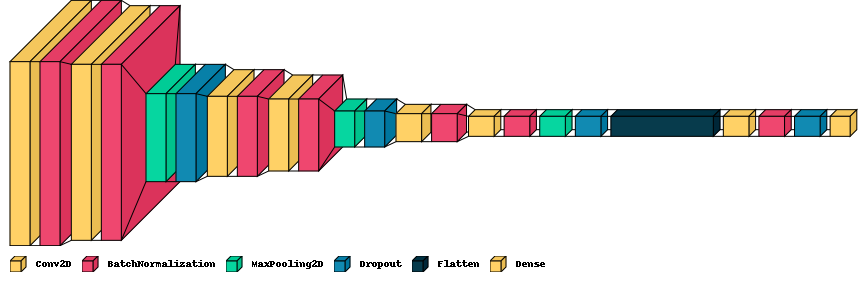

In [ ]:
visualkeras.layered_view(loaded_model_1, legend = True)